# 1. Simple coin flip exercise

You have a coin that when flipped ends up head with probability $p$ and ends up tail with probability $1−p$. The value of $p$ is unknown.

Flipping the coin $\bf{n}$ times you end up with $\bf{k}$ heads. The objective of this exercise is to estimate the probability distribution of $p$ using this data.

Credits: 
- Panos Ipeirotis, https://www.behind-the-enemy-lines.com/2008/01/are-you-bayesian-or-frequentist-or.html

## Import librairies

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import scipy.special as sc
from scipy.stats import beta     # beta probability distribution function

## Parameters of the exercise

In [2]:
k,n = 100,140 # number of heads and trials

> 1. What could be a coarse estimation of $p$?

Answer: A simple estimation of $p$ is to take:

$$
\hat p = \frac{k}{n} = \frac{100}{140} \approx 0.71
$$

Given that we make no assumption on the prior of $p$, this estimator is ubiased. Given a series of i.i.d observations $(X_{i})_{i\in\{1,\dots,n\}}$ of the coin flip:

$$
\mathbb{E}[\hat p] = \mathbb{E}\left[\frac{\sum_{i=1}^{n}X_{i}}{n}\right] = \frac{1}{n} np = p 
$$

## Bayesian treatment: mathematical approach

We will see that, for this particular exercice, it is actually straightforward to access p. Here, p is not a value, it's a distribution and to compute it we start from the Bayes rule:

$$
P(p|data) = \frac{P(data | p) P(p)}{P(data)},
$$

where $P(data | p)$ is given by the Binomial distribution which determines the probability of observing k "heads" in  n flip when the probability of success (head result) is given by p:

$$
P(data|p) = P(k|p,n) = \binom nk p^k (1-p)^{n-k}, \,\,\, \text{with the binomial coefficient: } \binom nk = \frac{n!}{k! (n-k)!}.
$$


Now, for the prior distribution $P(p)$, a very convenient choice for this scenario (also known as the conjugate prior of the binomial) is the <a href="https://en.wikipedia.org/wiki/Beta_distribution#Shapes">Beta distribution</a>, $Beta(p|a,b)$ defined as:

$$
Beta(p|a,b) =  \frac{1}{B(a,b)} p^{a-1}(1-p)^{b-1}
$$

where $B$ is the <a href="https://en.wikipedia.org/wiki/Beta_function">beta function</a> (not to be mistaken with the beta distribution !) and is a normalization constant to ensure that the probability integrates to 1. A distribution $Beta(p|a,b)$ has a mean of $\frac{a}{a+b}$.

---

> 2. With some simple calculations, show that the posterior is of the same distribution family as the prior (Beta distribution) and that the posterior distribution comes down to:

$$
P(p|data) = Beta(p|k+a, n - k + b) 
$$

***Thus the posterior of this problem depends of the data (k and n) and the two parameters (a and b) that defines the prior !***

Answer: We have that:

$$
P(p|data) = \frac{P(data | p) P(p)}{P(data)} 
$$

$$
P(p|data) = \frac{1}{P(data)} \binom nk p^k (1-p)^{n-k} \frac{1}{B(a,b)} p^{a-1}(1-p)^{b-1}
$$

$$
P(p|data) = \frac{1}{P(data)} \binom nk \frac{1}{B(a,b)} p^{(a+k)-1}(1-p)^{(b + n - k)-1}
$$

$$
P(p|data) = \frac{1}{P(data)} \binom nk \frac{B(k+a, n-k+b)}{B(a,b)} \frac{1}{B(k+a, n-k+b)} p^{(a+k)-1}(1-p)^{(b + n - k)-1}
$$

Since $P(p|data)$ is still a probability distribution on $p$, we have that:

$$
\int_{0}^{1}P(p|data) dp = 1
$$

Hence:

$$
\frac{1}{P(data)} \binom nk \frac{B(k+a, n-k+b)}{B(a,b)} \int_{0}^{1} \frac{1}{B(k+a, n-k+b)} p^{(a+k)-1}(1-p)^{(b + n - k)-1} dp = 1
$$

Well, the integral term is nothing more than the integral of a Beta distribution with parameters $k+a$ and $n-k+b$, hence it is equal to one, and therefore:

$$
\frac{1}{P(data)} \binom nk \frac{B(k+a, n-k+b)}{B(a,b)} = 1
$$

Thus:

$$
P(p|data) = \frac{1}{B(k+a, n-k+b)} p^{(a+k)-1}(1-p)^{(b + n - k)-1}
$$

Hence $p|data \sim Beta(a+k, b+n-k) $

## 1.1. Prior and posterior distributions

The Beta distribution, for parameters $a$ and $b$, is given by the function ```beta.pdf(x,a,b)``` 

> 3. Plot the shape of the prior for different values of a and b.


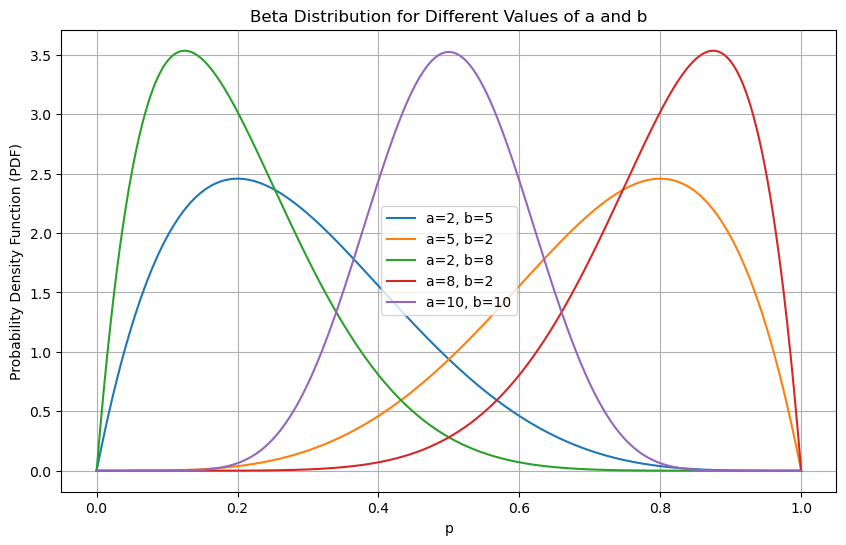

In [3]:
a_values = [2, 5, 2, 8, 10]
b_values = [5, 2, 8, 2, 10]

p = np.linspace(0, 1, 1000)

# Plot the Beta distributions for different values of a and b
plt.figure(figsize=(10, 6))
for a, b in zip(a_values, b_values):
    y = beta.pdf(p, a, b)
    plt.plot(p, y, label=f'a={a}, b={b}')

plt.title('Beta Distribution for Different Values of a and b')
plt.xlabel('p')
plt.ylabel('Probability Density Function (PDF)')
plt.legend()
plt.grid(True)
plt.show()

> 4. Why could it be a good choice to choose a symmetric ($a=b$) prior?

Answer: We have just seen that $p|data \sim Beta(a+k, b+n-k)$. We can interpret this as we have already observed $a$ heads from $a+b$ throws, and $k$ additional heads from $n$ throws. If we had no prior observation, there would be no reason to assume that we are more likely to see head than tails and vice versa, hence assuming $a=b$ we would have a symmetric distribution and a good choice. Choosing, for example, $a = b = 1$ would yield an uniform distribution on $[0,1]$. 

### 1.1.a) Model 1: uniform prior

> 5. For Model 1, choose an uniform prior ($a_1=b_1=1$) and plot the corresponding posterior distribution. 

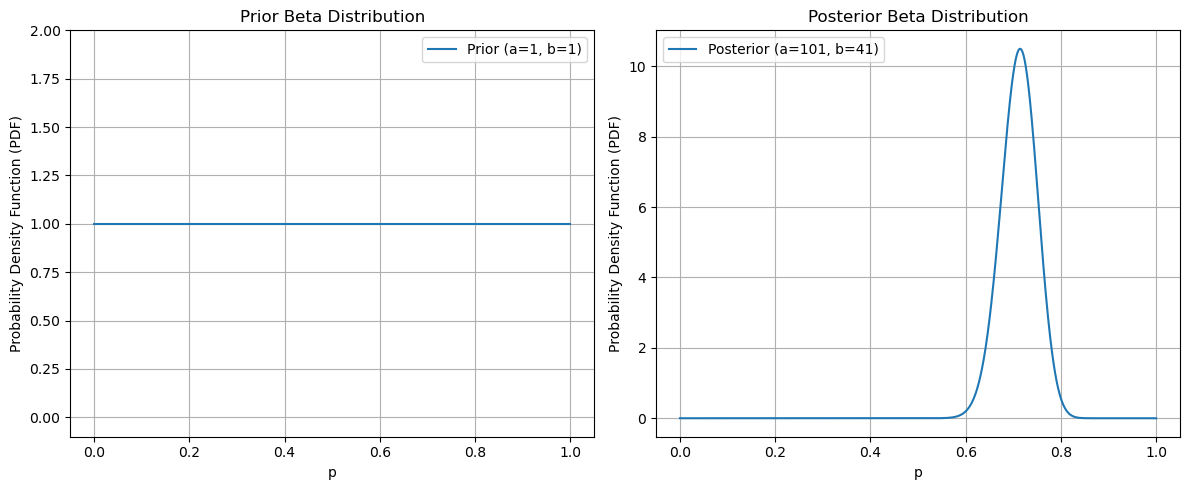

In [4]:
a_prior = 1
b_prior = 1

p = np.linspace(0, 1, 1000)

prior_distribution = beta.pdf(p, a_prior, b_prior)
posterior_distribution = beta.pdf(p, k + a_prior, n - k + b_prior)

plt.figure(figsize=(12, 5))

# Prior plot
plt.subplot(1, 2, 1)
plt.plot(p, prior_distribution, label=f'Prior (a={a_prior}, b={b_prior})')
plt.title('Prior Beta Distribution')
plt.xlabel('p')
plt.ylabel('Probability Density Function (PDF)')
plt.ylim(-.1, 2)
plt.legend()
plt.grid(True)

# Posterior plot
plt.subplot(1, 2, 2)
plt.plot(p, posterior_distribution, label=f'Posterior (a={k + a_prior}, b={n - k + b_prior})')
plt.title('Posterior Beta Distribution')
plt.xlabel('p')
plt.ylabel('Probability Density Function (PDF)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

> 6. Derive the MAP estimator and MMSE estimator (i.e. averaged $p$) for model 1. Is it consistent with your coarse estimation of $p$? How do they behave with the amount of data ($k$ and $n$)?

Answer: The MAP (Maximum a posteriori) corresponds taking the maximal value of the probability density function of the posterior $p|data \sim Beta(a+k, b+n-k)$. Let $a^{\prime} = a+k$ and $b^{\prime} = b+n-k$, hence:

$$
\frac{d f_{B(a^{\prime},b^{\prime})}}{dp} = \frac{1}{B(a^{\prime},b^{\prime})} \frac{d(p^{a^{\prime}-1}(1-p)^{b^{\prime}-1})}{dp} 
$$

$$
\frac{d f_{B(a^{\prime},b^{\prime})}}{dp} = \frac{1}{B(a^{\prime},b^{\prime})} p^{a^{\prime}-2}(1-p)^{b^{\prime}-2} ((1-p)(a^{\prime}-1) - p(b^{\prime}-1)) 
$$

$$
\frac{d f_{B(a^{\prime},b^{\prime})}}{dp} = \frac{1}{B(a^{\prime},b^{\prime})} p^{a^{\prime}-2}(1-p)^{b^{\prime}-2} ((a-1) - p(a + b - 2)) 
$$

Hence a point of extremum is $p = \frac{a^{\prime}-1}{a^{\prime}+b^{\prime}-2}$. It is necessarily a point of maximum since $f_{B(a^{\prime},b^{\prime})}$ is concave in $[0,1]$.

Thus, in the general case:

$$
\hat{p}_{\text{MAP}} = \frac{a^{\prime}-1}{a^{\prime}+b^{\prime}-2} = \frac{a + k - 1}{a + k + b + n - k - 2} = \frac{a + k - 1}{a + b + n - 2}
$$

Specifically, when $a=b=1$:

$$
\hat{p}_{\text{MAP}1} = \frac{k}{n}  
$$

Which is exactly the value of our coarse estimation of $p$.

The MMSE estimator minimizes the mean squared error of the posterior, hence, it corresponds to the expected value of $p|data \sim Beta(a+k, b+n-k)$. In the beginning of this exercise it is given that a distribution $Beta(p|a,b)$ has a mean of $\frac{a}{a+b}$, hence, given a beta distribution $B \sim Beta(a^{\prime}, b^{\prime})$ with $a^{\prime} = a + k$ and $b^{\prime} = b + n - k$:

$$
\hat{p}_{\text{MMSE}} = \mathbb{E}[B] = \frac{a^{\prime}}{a^{\prime} + b^{\prime}} = \frac{a+k}{a+ k + b + n - k} = \frac{a+k}{a+b+n}
$$

In this specific case:

$$
\hat{p}_{\text{MMSE1}} = \frac{k + 1}{n + 2}
$$

Which is different than our coarse estimation of $p$.

Now let us comment on the behavior of these two estimators when varying $k$ and $n$. 
- If we increase $k$ we will have a higher estimator of $p$, which makes sense. If we see more heads we will assume that the coin is biased in that direction.
- Inversely, if we increase $n$ for a fixed $k$, this means that we saw more tails, hence we estimate that $p$ is smaller, which makes sense intuitively.
- It is clear that when $k$ and $n$ are significantly greater than $1$, $\hat{p}_{\text{MMSE1}}$ will tend to the coarse estimator.

Here we have their numerical value:

In [5]:
a_prior = 1
b_prior = 1

print(f"p_MAP1 = {round((a_prior + k - 1)/(a_prior + b_prior + n - 2),3)}")
print(f"p_MMSE1 = {round((a_prior + k)/(a_prior + b_prior + n),3)}")

p_MAP1 = 0.714
p_MMSE1 = 0.711


### 1.1.b) Model 2: peaked prior

> 7. Now, for Model 2, plot the posterior distribution for a 'peaked' prior (e.g. $a_2=b_2=10$) and comment in comparison to Model 1.

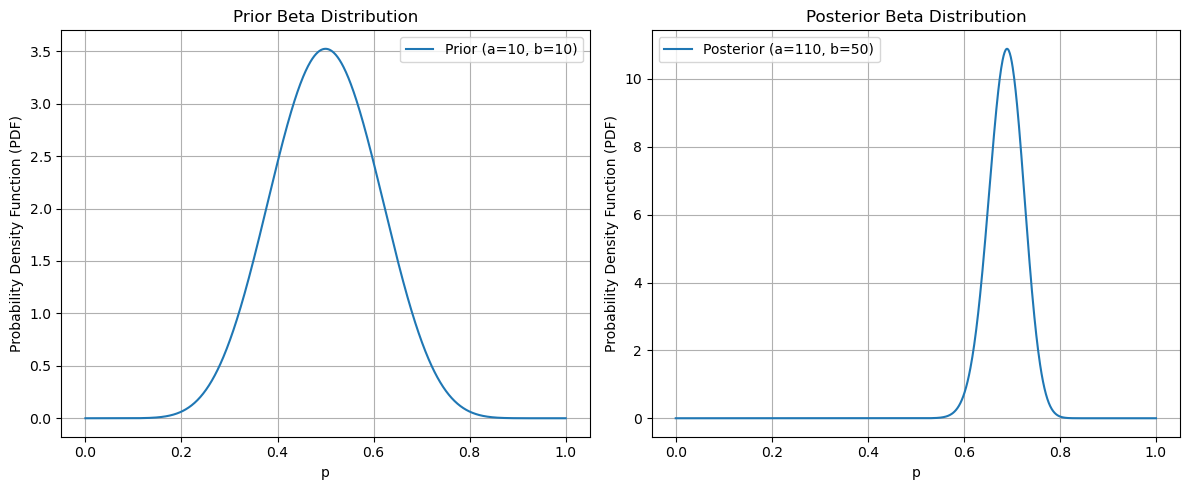

In [6]:
a_prior = 10
b_prior = 10

p = np.linspace(0, 1, 1000)

prior_distribution = beta.pdf(p, a_prior, b_prior)
posterior_distribution = beta.pdf(p, k + a_prior, n - k + b_prior)

plt.figure(figsize=(12, 5))

# Prior plot
plt.subplot(1, 2, 1)
plt.plot(p, prior_distribution, label=f'Prior (a={a_prior}, b={b_prior})')
plt.title('Prior Beta Distribution')
plt.xlabel('p')
plt.ylabel('Probability Density Function (PDF)')
plt.legend()
plt.grid(True)

# Posterior plot
plt.subplot(1, 2, 2)
plt.plot(p, posterior_distribution, label=f'Posterior (a={k + a_prior}, b={n - k + b_prior})')
plt.title('Posterior Beta Distribution')
plt.xlabel('p')
plt.ylabel('Probability Density Function (PDF)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

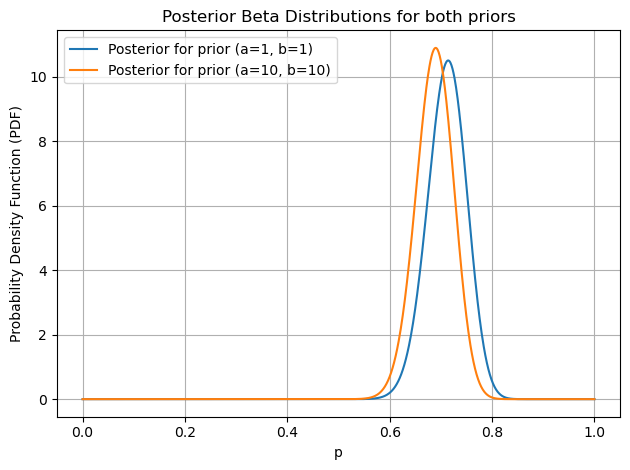

In [7]:
# First prior
a_prior_1 = 1
b_prior_1 = 1

# Second prior
a_prior_2 = 10
b_prior_2 = 10

# Generate p values from 0 to 1
p = np.linspace(0, 1, 1000)

# Compute posterior
posterior_distribution_1 = beta.pdf(p, k + a_prior_1, n - k + b_prior_1)
posterior_distribution_2 = beta.pdf(p, k + a_prior_2, n - k + b_prior_2)

plt.plot(p, posterior_distribution_1, label=f'Posterior for prior (a={a_prior_1}, b={b_prior_1})')
plt.plot(p, posterior_distribution_2, label=f'Posterior for prior (a={a_prior_2}, b={b_prior_2})')
plt.title('Posterior Beta Distributions for both priors')
plt.xlabel('p')
plt.ylabel('Probability Density Function (PDF)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

If we compare the two plots, the second one with $a = b = 10$ has its peak of probability closer to $0.5$. This makes sense in the second case our prior is higher for having $p = 0.5$. Intuitively is like we were more sure that the coin is fair than in the first case. Therefore, even after new observations it will have a tendency to be closer to $0.5$. 

It is also interesting to remark that the second curve is more peaked. This makes sense as setting higher values of $a$ and $b$ as priors is like we performed more throws before our $n$ throws ($a$ heads and $b$ tails, then further $k$ heads and $n-k$ tails). It is like we have observed more throws than if we picked a smaller couple of $a$ and $b$ with $a=b$.

> 8. Derive the MAP estimator and MMSE estimator (i.e. averaged $p$) for Model 2. Comment in comparison to Model 1.

Answer: Here we can use the same expression as we obtained in exercise $6$ but replacing $a=b=10$ instead of 1. 

For the estimator MAP:

$$
\hat{p}_{\text{MAP}} = \frac{a^{\prime}-1}{a^{\prime}+b^{\prime}-2} = \frac{a + k - 1}{a + k + b + n - k - 2} = \frac{a + k - 1}{a + b + n - 2}
$$

Specifically, when $a=b=10$:

$$
\hat{p}_{\text{MAP}2} = \frac{k + 9}{n + 18}  
$$

Now for the MMSE:

$$
\hat{p}_{\text{MMSE}} = \mathbb{E}[B] = \frac{a^{\prime}}{a^{\prime} + b^{\prime}} = \frac{a+k}{a+ k + b + n - k} = \frac{a+k}{a+b+n}
$$

In this specific case:

$$
\hat{p}_{\text{MMSE2}} = \frac{k + 10}{n + 20}
$$

Both estimators could be expressed as:

$$
p_{a=b}(x) = \frac{k + x}{n + 2x}
$$

Where $x \geq 0$

We have that:

$$
\frac{dp_{a=b}}{dx} = \frac{n + 2x - 2(k+x)}{(n+2x)^{2}} = \frac{n-2k}{(n+2x)^{2}}
$$

Therefore, if we obseve more head than tails, hence $n-2k < 0$, $p_{a=b}$ is a decreasing function on $x$. By increasing $x$ we only make the estimator closer to $0.5$. This makes sense as higher $x$ implies higher $a = b$, hence a stronger assumption that our coin is a fair coin. If we observe more tails than heads, $p_{a=b}$ is increasing on $x$, hence again our estimator will as well be closer to $0.5$ by increasing $x$.

For that reason, necessarily our second model will be closer to $0.5$ than the first one. Which is indeed what we observed in the plots. Here is their approximated value:

In [8]:
a_prior = 10
b_prior = 10

print(f"p_MAP1 = {round((a_prior + k - 1)/(a_prior + b_prior + n - 2),3)}")
print(f"p_MMSE1 = {round((a_prior + k)/(a_prior + b_prior + n),3)}")

p_MAP1 = 0.69
p_MMSE1 = 0.688


### 1.1.c) Model 3: Very peaked prior

> 9. For Model 3, plot the posterior distribution for a 'peaked' prior (e.g. $a_3=b_3=100$) and comment in comparison to Models 1 and 2.

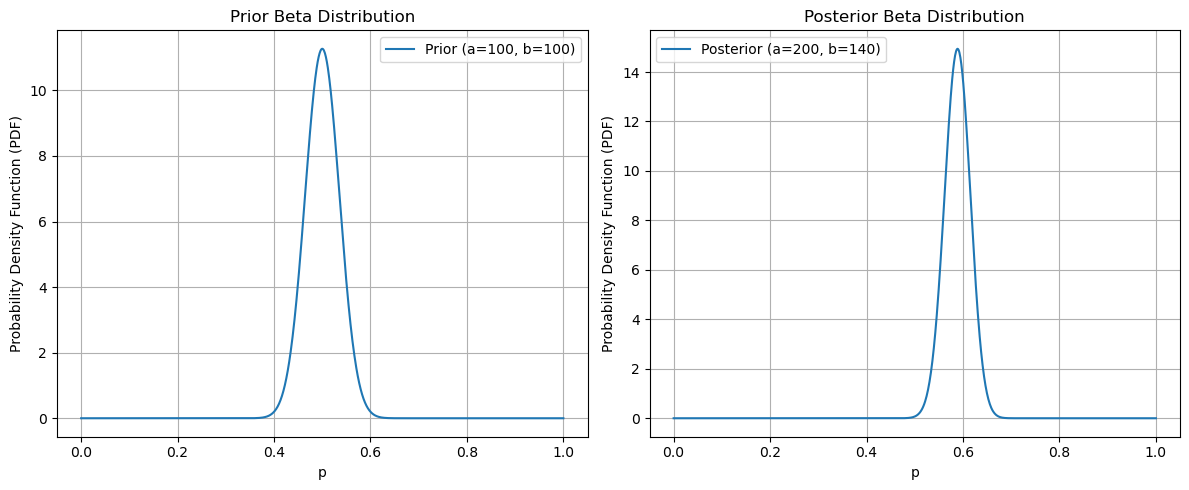

In [9]:
a_prior = 100
b_prior = 100

p = np.linspace(0, 1, 1000)

prior_distribution = beta.pdf(p, a_prior, b_prior)
posterior_distribution = beta.pdf(p, k + a_prior, n - k + b_prior)

plt.figure(figsize=(12, 5))

# Prior plot
plt.subplot(1, 2, 1)
plt.plot(p, prior_distribution, label=f'Prior (a={a_prior}, b={b_prior})')
plt.title('Prior Beta Distribution')
plt.xlabel('p')
plt.ylabel('Probability Density Function (PDF)')
plt.legend()
plt.grid(True)

# Posterior plot
plt.subplot(1, 2, 2)
plt.plot(p, posterior_distribution, label=f'Posterior (a={k + a_prior}, b={n - k + b_prior})')
plt.title('Posterior Beta Distribution')
plt.xlabel('p')
plt.ylabel('Probability Density Function (PDF)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

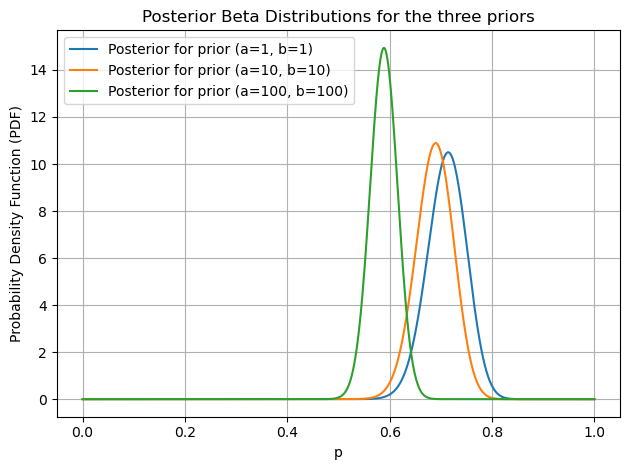

In [10]:
# First prior
a_prior_1 = 1
b_prior_1 = 1

# Second prior
a_prior_2 = 10
b_prior_2 = 10

# Third prior
a_prior_3 = 100
b_prior_3 = 100

# Generate p values from 0 to 1
p = np.linspace(0, 1, 1000)

# Compute posterior
posterior_distribution_1 = beta.pdf(p, k + a_prior_1, n - k + b_prior_1)
posterior_distribution_2 = beta.pdf(p, k + a_prior_2, n - k + b_prior_2)
posterior_distribution_3 = beta.pdf(p, k + a_prior_3, n - k + b_prior_3)

plt.plot(p, posterior_distribution_1, label=f'Posterior for prior (a={a_prior_1}, b={b_prior_1})')
plt.plot(p, posterior_distribution_2, label=f'Posterior for prior (a={a_prior_2}, b={b_prior_2})')
plt.plot(p, posterior_distribution_3, label=f'Posterior for prior (a={a_prior_3}, b={b_prior_3})')
plt.title('Posterior Beta Distributions for the three priors')
plt.xlabel('p')
plt.ylabel('Probability Density Function (PDF)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Again we observe the same thing as when comparing model 2 with respect to 1, but in this case as $a=b=100$ we see a stronger shift towards $0.5$ and the curve is way more peaked as explained in question $7$.

> 10. Derive the MAP estimator and MMSE estimator (i.e. averaged $p$) for model 1. Comment in comparison to Models 1 and 2.

Answer: Here we can use the same expression as we obtained in exercise $6$ but replacing $a=b=100$ instead of 1. 

For the estimator MAP:

$$
\hat{p}_{\text{MAP}} = \frac{a^{\prime}-1}{a^{\prime}+b^{\prime}-2} = \frac{a + k - 1}{a + k + b + n - k - 2} = \frac{a + k - 1}{a + b + n - 2}
$$

Specifically, when $a=b=100$:

$$
\hat{p}_{\text{MAP}3} = \frac{k + 99}{n + 198}  
$$

Now for the MMSE:

$$
\hat{p}_{\text{MMSE}} = \mathbb{E}[B] = \frac{a^{\prime}}{a^{\prime} + b^{\prime}} = \frac{a+k}{a+ k + b + n - k} = \frac{a+k}{a+b+n}
$$

In this specific case:

$$
\hat{p}_{\text{MMSE3}} = \frac{k + 100}{n + 200}
$$

From the analysis made in exercise $8$ we already know that this model will yield to an estimation of $p$ closer to 0.5. This is indeed what was observed in the plots above. Here is their approximated value:

In [11]:
a_prior = 100
b_prior = 100

print(f"p_MAP1 = {round((a_prior + k - 1)/(a_prior + b_prior + n - 2),3)}")
print(f"p_MMSE1 = {round((a_prior + k)/(a_prior + b_prior + n),3)}")

p_MAP1 = 0.589
p_MMSE1 = 0.588


## 1.2. Bayes factor

For comparing the plausibility of two models, we can resort to <a href="https://en.wikipedia.org/wiki/Bayes_factor">Bayes factors</a>.

The Bayes factor is the ratio of the marginal likelihoods of the two models, that is, the likelihoods of two statistical models integrated over the prior probabilities of their parameters. Here instead of comparing models, we can now also compare hypotheses encoded in the form of priors.

The marginal likelihood is given by:
$$
P(data) = \int P(data | p)P(p)dp
$$

The Bayes factor K for comparing the plausibility of two models is:
$$
K = \frac{P(data | \text{Model}_1)}{P(data | \text{Model}_2)} = \frac{\int P(data | p,  \text{Model}_1)P(p |  \text{Model}_1)dp}{\int P(data | p,  \text{Model}_2)P(p |  \text{Model}_2)dp}.
$$

A value of K > 1 means that Model1 is more strongly supported by the data under consideration than Model2. The relative strength of a Bayes factor can be determined by consulting the <a href="https://en.wikipedia.org/wiki/Bayes_factor#Interpretation">interpretation tables</a>.


For the binomial model (with a conjugate Beta prior) the Bayes factor is easily calculated:

$$
K = \frac{P(data | \text{Model}_1)}{P(data | \text{Model}_2)}  = \frac{B(k+a_1,n-k+b_1)}{B(a_1,b_1)} \times \frac{B(a_2,b_2)}{B(k+a_2,n-k+b_2)}.
$$

Here $B$ is the beta function.

> 11. Calculate the Bayes factors corresponding to the comparison of the three models used above (uniform prior, 'peaked' prior and 'very peakd' prior). Hint: to ease numerical calculation it is better to consider the logarithm of the beta function ```sc.betaln``` (instead of the beta function ```sc.beta``` that can have very low values). Conclude on which model to choose.

In [12]:
# Model 1
a1 = b1 = 1
prior1 = beta(a1, b1).pdf

# Model 2
a2 = b2 = 10
prior2 = beta(a2, b2).pdf

# Model 3
a3 = b3 = 100
prior3 = beta(a3, b3).pdf

# Calculate Bayes factors
K_1_2 = np.exp(sc.betaln(k + a1, n - k + b1) - sc.betaln(a1, b1)) / np.exp(sc.betaln(k + a2, n - k + b2) - sc.betaln(a2, b2))
K_2_3 = np.exp(sc.betaln(k + a2, n - k + b2) - sc.betaln(a2, b2)) / np.exp(sc.betaln(k + a3, n - k + b3) - sc.betaln(a3, b3))
K_1_3 = np.exp(sc.betaln(k + a1, n - k + b1) - sc.betaln(a1, b1)) / np.exp(sc.betaln(k + a3, n - k + b3) - sc.betaln(a3, b3))

print(f"Bayes factor K12 = {K_1_2}")
print(f"Bayes factor K23 = {K_2_3}")
print(f"Bayes factor K13 = {K_1_3}")

Bayes factor K12 = 1.4569931039824116
Bayes factor K23 = 240.62184947369246
Bayes factor K13 = 350.5843753506638


From the results obtained, the first model is the one that is more strongly supported by the data. From the interpretation tables, the data suggest evidence that model 1 is slightly better than model 2, and strongly better than model 3. 

## 1.3. Making predictions

In Bayesian inference we can use our probabilistic statements about the parameter from the posterior for making predictions. This is usually refered to as <a href="https://en.wikipedia.org/wiki/Posterior_predictive_distribution">posterior predictive distribution</a>. 


This is the distribution of unobserved data, conditioned on observed data and prior. It follows the idea as the marginal likelihood discussed above (which can be seen as a prior predictive distribution), namely that we want to evaluate new data on our fitted model. 

We can write the posterior predictive distribution for some new unseen data $x$, as the marginal of a distribution conditioned on observed data and prior:

$$
P(x |data) = \int P(x|p)P(p |data)dp
$$

where $data$ refers to our training data, and $x$ to some new unseen data.

> 12. For the beta-binomial model, compute $P(j | m,k,n,a,b)$ where $j$ refers to the new number of Heads, $m$ to the new number of total flips, $k$ to the previous number of Heads, $n$ to the previous number of total flips, and $a$ and $b$ to our prior hyperparameters.


$$
P(j | m,k,n,a,b) = \int 
P(j|m,p)P(p |k,n,a,b)dp= \binom{m}{j} \frac{B(k+j+a,n-k+m-j+b)} {B(a+k,b+n-k)}
$$


Here we will take the best model according to previous analysis: $a = b = 1$.

For this example we will take two examples, one with $m = 2$ and another with $m = 5$.

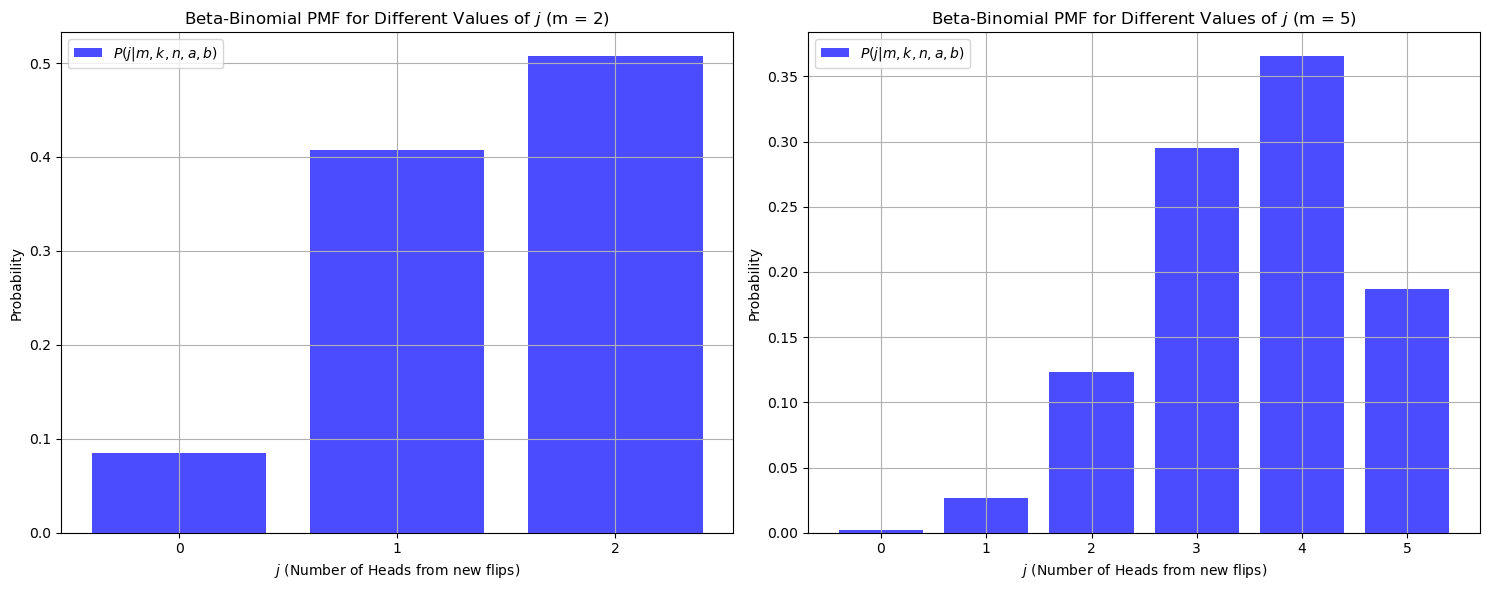

In [13]:
def beta_binomial_pmf(j, m, k, n, a, b):
    beta_with_observations = sc.betaln(k + j + a, n - k + m - j + b)
    beta_posterior = sc.betaln(a + k, b + n - k)
    return sc.comb(m, j) * np.exp(beta_with_observations - beta_posterior)

# Selecting a and b from the best model according to previous analysis
a = 1   
b = 1   
    
m_values = [2, 5]

plt.figure(figsize=(15, 6))

for i, m in enumerate(m_values, 1):
    j_values = np.arange(0, m + 1)
    probabilities = [beta_binomial_pmf(j, m, k, n, a, b) for j in j_values]

    plt.subplot(1, 2, i)
    plt.bar(j_values, probabilities, color='blue', alpha=0.7, label=r'$P(j|m,k,n,a,b)$')
    plt.title(f'Beta-Binomial PMF for Different Values of $j$ (m = {m})')
    plt.xlabel('$j$ (Number of Heads from new flips)')
    plt.ylabel('Probability')
    plt.xticks(j_values)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


> 13. Calculate the probability of flipping 2 heads out of 2 new flips with the model you selected as the best in the previous question
>
> 14. Calculate the probability of flipping 3 heads out of 5 new flips with the model you selected as the best in the previous question

In [14]:
print(f"For Q13, the probability of having 2 heads out of 2 new flips is: {beta_binomial_pmf(2, 2, k, n, a, b)}")
print(f"For Q14, the probability of having 3 heads out of 5 new flips is: {beta_binomial_pmf(3, 5, k, n, a, b)}")

For Q13, the probability of having 2 heads out of 2 new flips is: 0.5073377326898485
For Q14, the probability of having 3 heads out of 5 new flips is: 0.2951781356488044


> 15. What can you conclude about the quality of these predictions? How will the prediction probability behave with increasing number of new flips? Check by producing the plot of the prediction probability of any $j$ with values of m between $1$ and $200$ for instance.

Our predictions seem fairly reasonable given that we had a coin that gave $100$ heads out of $140$ throws and we started from a prior that the probability of the parameter $p$ was uniform on [0,1]. With the increase of the number of flips, we would expect that our model would loose its quality, and thus we could update our distribution given the new set of observations that we have.

We would expect that for any $j$, at a given $n$ we would reach a maximum proability of observation (when $j/n = p_{posterior}$) and decrease afterwards. This indeed what we observe in the plots below.

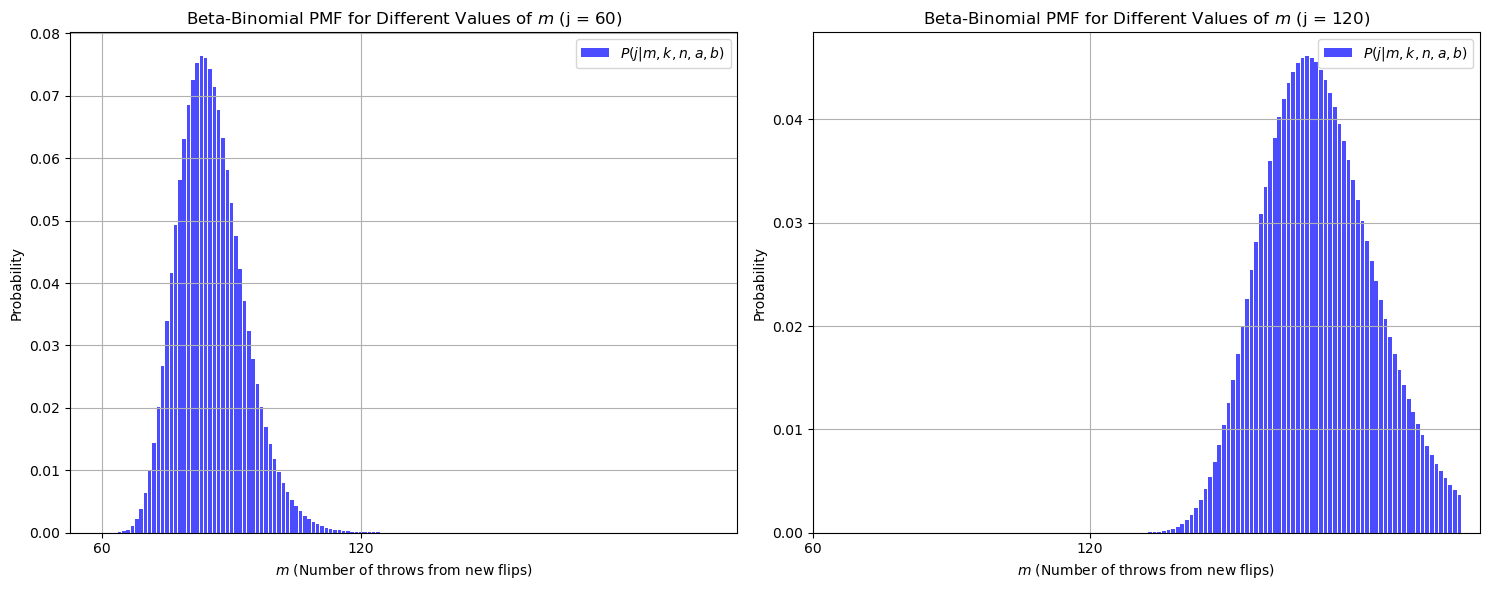

In [15]:
# Selecting a and b from the best model according to previous analysis
a = 1   
b = 1   
    
j_values = [60, 120]

plt.figure(figsize=(15, 6))

for i, j in enumerate(j_values, 1):
    m_values = np.arange(j,201)
    probabilities = [beta_binomial_pmf(j, m, k, n, a, b) for m in m_values]

    plt.subplot(1, 2, i)
    plt.bar(m_values, probabilities, color='blue', alpha=0.7, label=r'$P(j|m,k,n,a,b)$')
    plt.title(f'Beta-Binomial PMF for Different Values of $m$ (j = {j})')
    plt.xlabel('$m$ (Number of throws from new flips)')
    plt.ylabel('Probability')
    plt.xticks(j_values)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# 2. The lighthouse problem

The following is a classic estimation problem called the "lighthouse problem". The figure shows a set of receivers distributed at coordinates $x_k$ along the shore and a lighthouse located at some position $(\alpha,\beta)$ offshore. The idea is that the coastline is equipped with a continuous strip of photodetectors. The lighthouse flashes the shore $N$ times at some random angle $\theta_k$. The strip of  photodetectors registers the $k^{th}$ flash position $x_k$, but the angle $\theta_k$ of the flash is unknown. Furthermore, the lighthouse beam is laser-like so there is no smearing along the strip of photodetectors. In other words, the lighthouse is actually more of a disco-ball in a dark nightclub.

The problem is how to estimate $\alpha$ given we already have $\beta$.

Credits:
- Data Analysis: Bayesian tutorial. D.S.Sivia.

<img src="Lighthouse_schematic.jpg" width="600">

Given the nature of the lighthouse emission it seems reasonable to assign an uniform density function to the angle $\theta_k$, such that it is uniformly distributed between $\pm \pi/2$:
$$ P(\theta_k|\alpha, \beta) = \frac{1}{\pi} $$

Now, what we really want is the density function for $x_k$ which will tell us the probability that the $k^{th}$ flash will be recorded at position $ x_k $. From basic trigonometry, we have the following:

$$ \beta \tan(\theta_k) = x_k - \alpha $$

Thus, after a transformation of variables, we obtain the following:

$$ P(x_k|\alpha, \beta) = \frac{\beta}{\pi \left[\beta ^2 +(x_k-\alpha)^2 \right]}. $$

This distribution is known as the [Cauchy distribution](https://en.wikipedia.org/wiki/Cauchy_distribution).




## 2.1. Data generation

First we'll generate some toy data that will be used in this exercise. We assume that the 'true' values of the parameters that we want to infer are $\alpha = \beta = 1$.

> 16. Run the cell below to generate N=250 values of the angle $\theta_k$ uniformely distributed between $-\pi/2$ and $+\pi/2$ and to calculate the corresponding $x_k$ values.
>
> 17. Make a histogram of the $\theta_k$ and $x_k$ values
>
> 18. Define the function $P(x_k|\alpha, \beta)$ and draw it for fixed $\alpha = \beta = 1$ values.

Exercise 17:


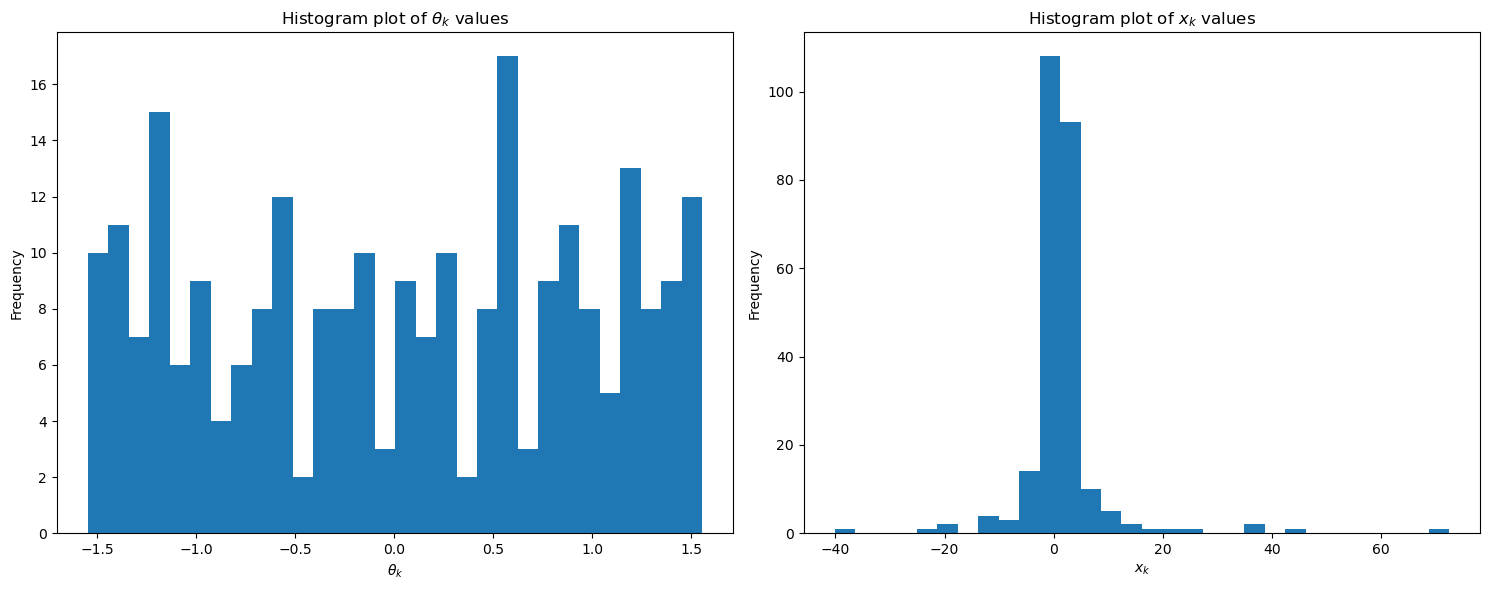

Exercise 18:


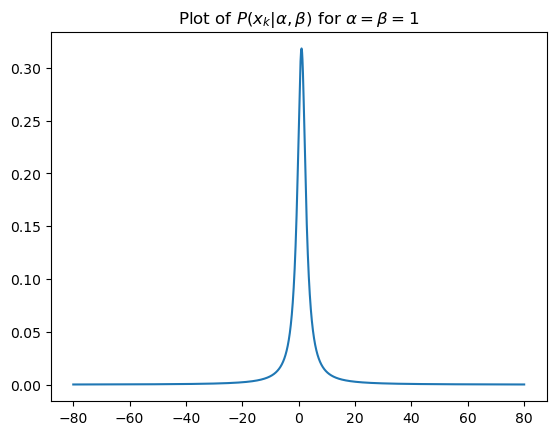

In [16]:
# Parameters
N = 250
alpha = 1
beta = 1

# Exercise 16
def generate_data(N):
    thetas = np.random.uniform(-np.pi/2, np.pi/2, N)
    x_samples = alpha + beta * np.tan(thetas)
    
    return thetas, x_samples

thetas, x_samples = generate_data(N)

plt.figure(figsize=(15, 6))

# Exercise 17
print("Exercise 17:")

# Generating plots
# Plot of theta
plt.subplot(1, 2, 1)
plt.hist(thetas, bins = 30)
plt.title(r"Histogram plot of $\theta_{k}$ values")
plt.xlabel(r"$\theta_{k}$")
plt.ylabel('Frequency')

# Plot of x
plt.subplot(1, 2, 2)
plt.hist(x_samples, bins = 30)
plt.title('Histogram plot of $x_{k}$ values')
plt.xlabel("$x_{k}$")
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Exercise 18
print("Exercise 18:")

# Function for computing P
def p_cauchy(x, alpha, beta):
    return beta / (np.pi * (beta**2) + (x - alpha)**2)

# Generating points
xs_plot = np.linspace(-80, 80, 10000)
ps = p_cauchy(xs_plot, alpha, beta)

# Plotting
plt.plot(xs_plot, ps)
plt.title(r"Plot of $P(x_k|\alpha, \beta)$ for $\alpha = \beta = 1$")
plt.show()


## 2.2. Bayesian inference

Given a set of observed measurements $\{x_k\}$ we can infer the position along the shore of the lighthouse, $\alpha$, by the posterior pdf $P(\alpha|\{x_k\},\beta)$. Here, to simplify the problem, we assume that the distance to the coast, $\beta$, is known. Writing down the Bayes theorem we have:

$$
P(\alpha|\{x_k\},\beta) \propto P(\{x_k\}|\alpha,\beta) P(\alpha|\beta).
$$

As the knowledge of $\beta$, without the data, tells us nothing new about the position $\alpha$, let us assign a single uniform pdf to the prior:

$$
P(\alpha|\beta) = P(\alpha) \begin{cases}
 A & \alpha_\text{min} \leq \alpha \leq \alpha_\text{max} \\
 0 & \text{otherwise}
\end{cases}
$$

where $A$ is a constant and $\alpha_\text{min}$ and $\alpha_\text{max}$ represent the limit of the coastline.

$P(\{x_k\}|\alpha,\beta)$ is the likelihood of the data that is just the product of the probabilities for obtaining the N individual observations $x_k$:

$$
P(\{x_k\}|\alpha,\beta) = \prod_{k=1}^N P(x_k|\alpha,\beta).
$$

From the equations above one can write the logarithm of the posterior distribution as:

$$\mathcal{L}(\alpha)= \log P(\alpha|\{x_k\},\beta) = \text{constant}- \sum_{k=1}^N \ln \left[ \beta^2 + (x_k-\alpha)^2 \right]
$$

The MAP estimate of the position $\alpha$ is given by the maximum of the posterior pdf. Taking the first derivative gives us the equation we would have to solve:

$$
\frac{d \mathcal{L}}{d \alpha} = 2 \sum_{k=1}^N \frac{x_k-\alpha}{\beta^2+(x_k-\alpha)^2}=0.
$$

Unfortunately, there is no easy way to solve for the optimal $\alpha$ for this equation. However, nothing can prevent us from addressing this problem numerically.

For this we will use brute force to evaluate $\mathcal{L}(\alpha)$ for a range of possible values $\alpha$:

> 19. Implement the function $\mathcal{L}(\alpha)$. We can ignore the constant in this expression as we will deal with it below,
>
> 20. Calculate $\mathcal{L}(\alpha)$ with the available data and for a grid of values in the range $3 \leq \alpha \leq 3$. Then subtract the maximum value of $\mathcal{L}(\alpha)$ to $\mathcal{L}(\alpha)$
>
> 21. Finally plot the posterior distribution $P(\alpha|\{x_k\},\beta) = \exp(\mathcal{L}(\alpha))$ as a function of $\alpha$.
>
> 22. Print out the maximum posterior estimate

maximum posterior estimate = 1.061


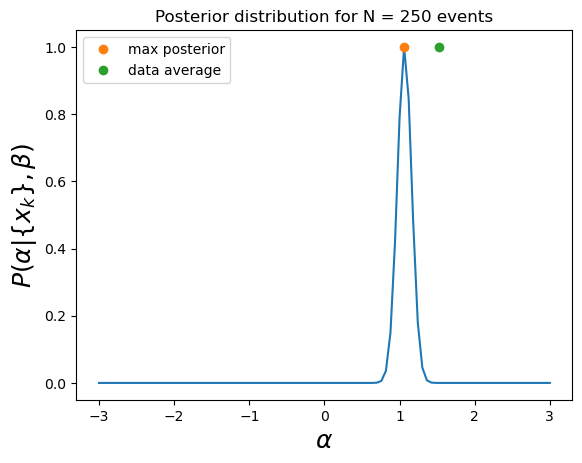

In [17]:
# 19)
def logposterior(alpha,x_samples,beta):
    return -1 * np.sum(np.log(np.power(x_samples-alpha,2)+beta**2))

# 20)
aa = np.linspace(-3,3,100)
llog = []
for a in aa:
    llog += [logposterior(a,x_samples,beta)]

llog = np.array(llog)
llog -= np.max(llog) # Subtract max value

# 21)
posterior = np.exp(llog)
plt.plot(aa,posterior)
plt.xlabel(r'$\alpha$',fontsize=18)
plt.ylabel(r'$P(\alpha|\{x_k\},\beta)$',fontsize=18)
plt.title('Posterior distribution for N = %d events' % N)

# 22)
ymax = np.max(posterior)
xpos = np.where(posterior == ymax)
alpha_max = aa[xpos]
plt.plot(alpha_max,ymax,'o',label='max posterior')
plt.plot(x_samples.mean(),ymax,'o',label='data average')
plt.legend()

print('maximum posterior estimate = %.3f' % alpha_max[0])

## 2.3. Comparing maximum posterior estimate and plain averaging

The best estimator for a mean $\mu$ of a normal distribution is simply given by the sample average. As in the limit of large numbers all distributions should behave as a normal distribution (this is the Central Limit Theorem) why didn't we just take the average of the $\lbrace x_k \rbrace$ and use that to estimate $\alpha$?

We will see here that in the present case, this is a bad idea!

> 23. Run the full procedure above 10 times. At each trial generate a new sample, then compare the maximum posterior estimate with the sample average. Do these result seem to agree ?
>
> 24. Now let's explore this problem by performing a large number of trials (say 100), Make a plot showing, as a function of the trial number, the posterior maximum estimate and the sample average with its standard deviation. What is your conclusion ? 


Trial 1
maximum posterior estimate = 0.939
alpha using average = -1.261 +- 3.399
Trial 2
maximum posterior estimate = 0.879
alpha using average = 1.302 +- 0.552
Trial 3
maximum posterior estimate = 1.061
alpha using average = 1.961 +- 1.109
Trial 4
maximum posterior estimate = 1.121
alpha using average = -0.728 +- 3.446
Trial 5
maximum posterior estimate = 1.121
alpha using average = 0.098 +- 0.938
Trial 6
maximum posterior estimate = 1.061
alpha using average = -1.283 +- 2.695
Trial 7
maximum posterior estimate = 0.879
alpha using average = 2.621 +- 1.828
Trial 8
maximum posterior estimate = 0.939
alpha using average = 1.532 +- 0.294
Trial 9
maximum posterior estimate = 1.182
alpha using average = -0.060 +- 1.090
Trial 10
maximum posterior estimate = 1.061
alpha using average = -0.893 +- 3.205


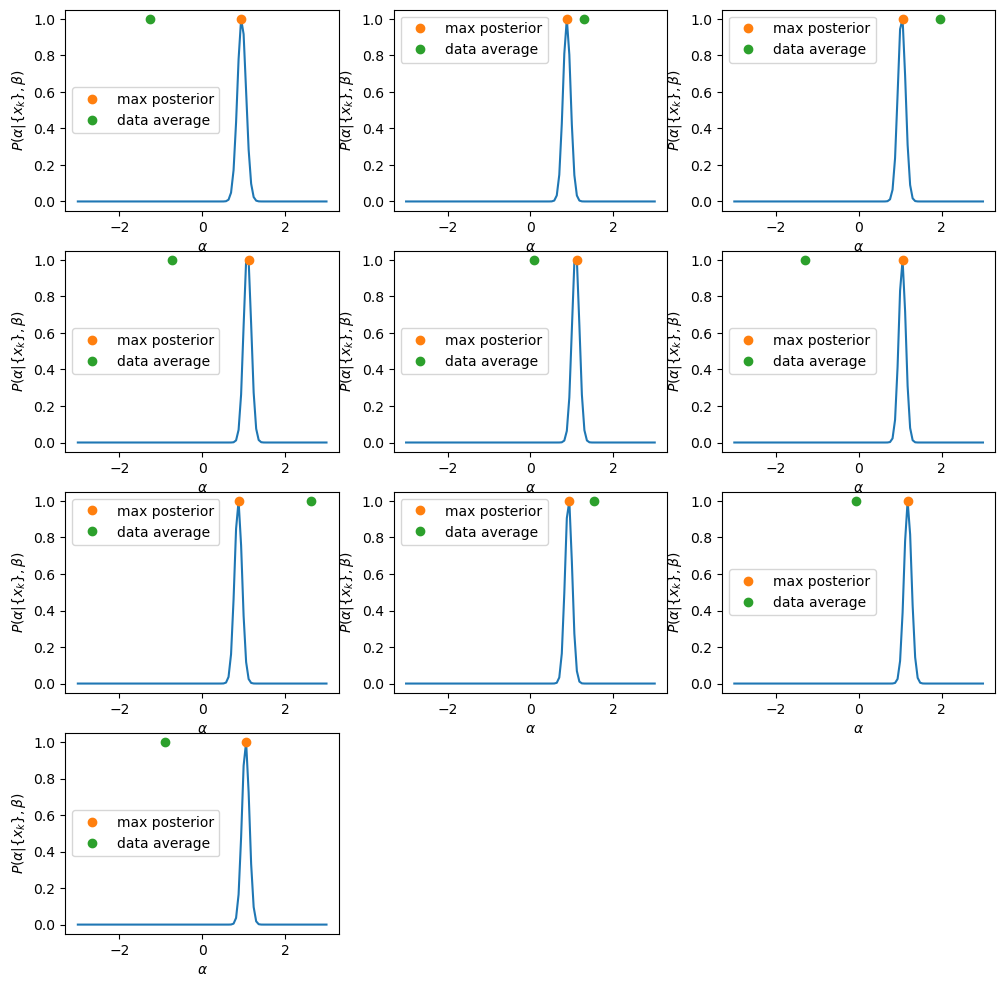

In [18]:
# 23)

Ntrial = 10

def runtrial(do_plot=True):

    # generate new data
    theta_samples, x_samples = generate_data(N)
    
    # Calculate posterior
    aa = np.linspace(-3,3,100)
    llog = []
    for a in aa:
        llog += [logposterior(a,x_samples,beta)]
        
    llog = np.array(llog)
    llog -= np.max(llog) # Subtract max value
    
    posterior = np.exp(llog)

    ymax = np.max(posterior)
    xpos = np.where(posterior == ymax)
    alpha_max = aa[xpos]

    sample_mean = x_samples.mean() # mean
    sample_mean_error = x_samples.std() / np.sqrt(N)
    
    if do_plot:
        plt.plot(aa,posterior)
        plt.xlabel(r'$\alpha$')
        plt.ylabel(r'$P(\alpha|\{x_k\},\beta)$')
        #plt.title('Posterior distribution for N = %d events' % N)

        plt.plot(alpha_max,ymax,'o',label='max posterior')
        plt.plot(x_samples.mean(),ymax,'o',label='data average')
        plt.legend()
   
    return alpha_max[0], sample_mean, sample_mean_error, np.median(x_samples)

plt.figure(figsize=(12,12))
for i in range(Ntrial):
    print('Trial %d' % (i+1))
    plt.subplot(4,3,i+1)
    alpha_max, sample_mean, sample_mean_error, sample_median = runtrial(True)
    print('maximum posterior estimate = %.3f' % alpha_max)
    print('alpha using average = %.3f +- %.3f' % (sample_mean,sample_mean_error))


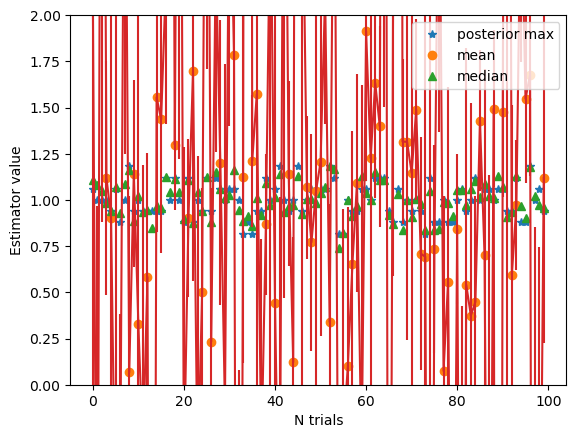

In [19]:
# 24)

Ntrial = 100

posterior_max = []
mean = []
mean_error = []
median = []

for i in range(Ntrial):
    alpha_max, sample_mean, sample_mean_error, sample_median = runtrial(False)
    posterior_max += [alpha_max]
    mean += [sample_mean]
    mean_error += [sample_mean_error]
    median += [sample_median]
    
plt.plot(range(Ntrial), posterior_max, '*',label='posterior max')
plt.plot(range(Ntrial), mean, 'o',label='mean')
plt.plot(range(Ntrial), median, '^',label='median')
plt.errorbar(range(Ntrial), mean, yerr=mean_error)
plt.ylim(0,2)
plt.xlabel('N trials')
plt.ylabel('Estimator value')
plt.legend()    

In [20]:
print('Mean of posterior max values: %.3f +- %.3f' %(np.array(posterior_max).mean(),np.array(posterior_max).std()))
print('Mean of median values: %.3f +- %.3f' %(np.array(median).mean(),np.array(median).std()))
print('Mean of average values: %.3f +- %.3f' %(np.array(mean).mean(),np.array(mean).std()))

Mean of posterior max values: 0.999 +- 0.092
Mean of median values: 1.002 +- 0.095
Mean of average values: 1.140 +- 3.835


Conclusion: you should observe that the estimate using the average has enormous variance. This is a consequence of the fact that the Cauchy distribution is very peculiar as it has no defined mean or variance! Therefore the Central Limit Theorem is not applicable to the Cauchy distribution.

The morale of this exercise is that the sample mean is not alway a good number to use, and in this particular case it is best to use more refined knowledge of the posterior pdf to determine what is best. Such knowledge can be gained by outputting samples from such distributions by Monte Carlo methods.

> 25. What other estimate than the averaged sample value could be used to estimate $\alpha$? Add this new estimator to your answer to the previous questions 23 and 24 

The estimator added was the median.